In [65]:
import numpy as np
from KRZmetric import *

In [36]:
def dt_J(chi,e,p,spin):
    return 1-2*(1+e*np.cos(chi))/p+spin**2/p**2*(1+e*np.cos(chi))**2

In [24]:
def dt_Vr(chi,e,p,spin,E):
    x=dt_x(e,p,spin)
    return x**2+spin**2+2*spin*x*E-2*x**2/p*(3+e*np.cos(chi))

In [25]:
def dt_Vphi(chi,e,p,spin,E):
    x=dt_x(e,p,spin)
    return x+spin*E-2*x/p*(1+e*cos(chi))


In [26]:
def dt_Vt(chi,e,p,spin,E):
    x=dt_x(e,p,spin)
    return spin**2*E-2*spin*x/p*(1+e*np.cos(chi)) + E*p**2/(1+e*np.cos(chi))**2

In [27]:
def dt_F(e,p,spin):
    return (p**3- 2*(3+e**2)*p**2 + (3+e**2)**2 *p- 4*spin**2*(1-e**2)**2 )/p**3

In [28]:
def dt_N(e,p,spin):
    return 2*( -p**2 + ((3+e**2) - spin**2)*p - spin**2*(1+3*e**2)  )/p

In [29]:
def dt_C(e,p,spin):
    return (spin**2-p)**2

In [30]:
def dt_x(e,p,spin):
    return (np.sqrt(dt_N(e,p,spin)**2-4*dt_F(e,p,spin)*dt_C(e,p,spin))-dt_N(e,p,spin))/(2*dt_F(e,p,spin))

In [31]:
def Tr_intg(chi):
    return 2*dt_Vt(chi,e,p,spin,E)/(dt_J(chi,e,p,spin)*np.sqrt(dt_Vr(chi,e,p,spin,E)))

In [32]:
e=0.5
p=6
spin=0.5

In [33]:
rmax=p/(1-e)
rmin=p/(1+e)
invgmin=metric_KRZ_inverse(spin,0,rmin,np.pi/2)
invgmax=metric_KRZ_inverse(spin,0,rmax,np.pi/2)

EoverL = ((invgmax[3][0] - invgmin[3][0]) + sqrt((invgmax[3][0] - invgmin[3][0]) *(invgmax[3][0] - invgmin[3][0]) - (invgmax[0][0] - invgmin[0][0])*(invgmax[3][3] - invgmin[3][3]))) / ( invgmax[0][0]-invgmin[0][0] );
Lz = sqrt( (invgmax[3][0]-invgmin[3][0]) / ( EoverL*EoverL*( invgmin[3][0]*invgmax[0][0] - invgmax[3][0]*invgmin[0][0] )+ ( invgmin[3][0]*invgmax[3][3]- invgmax[3][0]*invgmin[3][3] )  )   );
E=Lz*EoverL

In [34]:
import scipy

In [37]:
Tr=scipy.integrate.quad(Tr_intg,0,np.pi)

D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
D:\ProgramFiles\lib\site-packages\scipy\integrate\quadpack.py:364: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [121]:
p=6
E,Lz,e,p,spin

(0.94519656082582471, 3.1304678824128427, 0.5, 6, 0.5)

In [164]:
dchi=1e-6
chi=np.linspace(dchi/2,np.pi-dchi/2,int(np.pi/dchi))

In [165]:
chi

array([  5.00000000e-07,   1.50000021e-06,   2.50000042e-06, ...,
         3.14159015e+00,   3.14159115e+00,   3.14159215e+00])

In [166]:
J=1-2*(1+e*np.cos(chi))/p+spin**2/p**2*(1+e*np.cos(chi))**2

In [167]:
J

array([ 0.515625  ,  0.515625  ,  0.515625  , ...,  0.83506944,
        0.83506944,  0.83506944])

In [168]:
F=(p**3- 2*(3+e**2)*p**2 + (3+e**2)**2 *p- 4*spin**2*(1-e**2)**2 )/p**3
N=2*( -p**2 + ((3+e**2) - spin**2)*p - spin**2*(1+3*e**2)  )/p
C=(spin**2-p)**2

In [169]:
F,N,C

(0.2074652777777778, -6.145833333333333, 33.0625)

In [170]:
N**2-4*F*C

10.333984374999993

In [171]:
#x=np.sqrt((-N+np.sqrt(N**2-4*F*C))/2/F)
x=Lz-spin*E

In [172]:
x

2.6578696019999302

In [173]:
Vr=x**2+spin**2+2*spin*x*E-2*x**2/p*(3+e*np.cos(chi))
Vphi=x+spin*E-2*x/p*(1+e*cos(chi))
Vt=spin**2*E-2*spin*x/p*(1+e*np.cos(chi)) + E*p**2/(1+e*np.cos(chi))**2

In [174]:
Vr,Vphi,Vt

(array([ 1.58483074,  1.58483074,  1.58483074, ...,  3.93958768,
         3.93958768,  3.93958768]),
 array([ 1.80153308,  1.80153308,  1.80153308, ...,  2.68748962,
         2.68748962,  2.68748962]),
 array([  14.69497671,   14.69497671,   14.69497671, ...,  136.12311476,
         136.12311477,  136.12311477]))

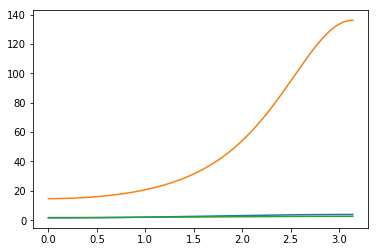

In [175]:
import matplotlib.pyplot as plt

plt.plot(chi,Vr)
plt.plot(chi,Vt)
plt.plot(chi,Vphi)

In [176]:
Tr=2*np.sum(Vt/J/np.sqrt(Vr))*dchi

In [177]:
omg_rdt=2*np.pi/Tr
omg_rdt

0.024937448541679084

In [178]:
Dphi=2*np.sum(Vphi/J/np.sqrt(Vr))*dchi

In [179]:
omg_phidt=Dphi/Tr
omg_phidt

0.052320638647147005

In [8]:
def getfreq_dt_frommaxi(t,r,phi):
    #由序列获得orbital frequency(对t的),这个序列必须是从r最大值开始的
    #p=np.mean(r)
    omgr=[]
    omgphi=[]
    indr=[]
    phi=phi-phi[0]
    n=1
    for i in np.arange(t.size-1):
        if i==0:
            indr.append(i)
        elif(r[i]>r[i-1] and r[i+1]<r[i]):
            indr.append(i)

    for ii in np.arange(len(indr)):
        if ii==0:
            continue
        omgr.append(2*np.pi/(t[indr[ii]]-t[indr[ii-1]]))
        omgphi.append((phi[indr[ii]]-phi[indr[ii-1]])/(t[indr[ii]]-t[indr[ii-1]]))

    omgr=np.array(omgr)
    avgomgr=np.mean(omgr)
    avgomgphi=np.mean(np.array(omgphi))

    return avgomgr,avgomgphi

In [9]:
d1=0
spin=0.5
e=0.5
p=6
try:
    index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt \
('C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(spin,d1,e,p),unpack=True)
except:
    print('trace_spin%.6f_d1%.6f_e0%.6f_p%.6f.dat  does not exist'%(spin,d1,e,p))
    quit()


In [162]:
getfreq_dt_frommaxi(t,r,phi)

(0.024937335781133982, 0.052320498117432272)

In [180]:
omg_rdt,omg_phidt

(0.024937448541679084, 0.052320638647147005)

In [6]:
def getfreq_dt_fromepa(e,p,spin):
    rmax=p/(1-e)
    rmin=p/(1+e)
    invgmin=metric_KRZ_inverse(spin,0,rmin,np.pi/2)
    invgmax=metric_KRZ_inverse(spin,0,rmax,np.pi/2)

    EoverL = ((invgmax[3][0] - invgmin[3][0]) + sqrt((invgmax[3][0] - invgmin[3][0]) *(invgmax[3][0] - invgmin[3][0]) - (invgmax[0][0] - invgmin[0][0])*(invgmax[3][3] - invgmin[3][3]))) / ( invgmax[0][0]-invgmin[0][0] );
    Lz = sqrt( (invgmax[3][0]-invgmin[3][0]) / ( EoverL*EoverL*( invgmin[3][0]*invgmax[0][0] - invgmax[3][0]*invgmin[0][0] )+ ( invgmin[3][0]*invgmax[3][3]- invgmax[3][0]*invgmin[3][3] )  )   );
    E=Lz*EoverL
    x=Lz-spin*E
    
    dchi=1e-6
    chi=np.linspace(dchi/2,np.pi-dchi/2,int(np.pi/dchi))
    J=1-2*(1+e*np.cos(chi))/p+spin**2/p**2*(1+e*np.cos(chi))**2
    Vr=x**2+spin**2+2*spin*x*E-2*x**2/p*(3+e*np.cos(chi))
    Vphi=x+spin*E-2*x/p*(1+e*cos(chi))
    Vt=spin**2*E-2*spin*x/p*(1+e*np.cos(chi)) + E*p**2/(1+e*np.cos(chi))**2
    
    Tr=2*np.sum(Vt/J/np.sqrt(Vr))*dchi
    Dphi=2*np.sum(Vphi/J/np.sqrt(Vr))*dchi
    omg_rdt=2*np.pi/Tr
    omg_phidt=Dphi/Tr
    
    return omg_rdt,omg_phidt

In [7]:
getfreq_dt_fromepa(0.5,6,0.5)

(0.024937448541679084, 0.052320638647147005)

In [10]:
getfreq_dt_frommaxi(t,r,phi)

(0.024937335781133982, 0.052320498117432272)

In [11]:
d1=0.2

In [12]:
try:
    index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt \
('C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(spin,d1,e,p),unpack=True)
except:
    print('trace_spin%.6f_d1%.6f_e0%.6f_p%.6f.dat  does not exist'%(spin,d1,e,p))
    quit()

In [13]:
avgomg_rdt,avgomg_phidt=getfreq_dt_frommaxi(t,r,phi)

In [66]:
avgomg_rdt,avgomg_phidt=0.024842579895747997,0.06982805116393444


In [67]:
def myfunc(x):
    print('called')
    e=x[0]
    p=x[1]
    omg=getfreq_dt_fromepa(e,p,spin)
    y=[]
    y.append(avgomg_rdt-omg[0])
    y.append(avgomg_phidt-omg[1])
    return y

In [68]:

from scipy.optimize import root,fsolve

In [69]:
mye,myp=fsolve(myfunc,[0.408,6.48])

called
called
called
called
called
called


D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt
D:\ProgramFiles\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in sqrt


called
called
called
called
called
called
called
called
called
called
called


D:\ProgramFiles\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [70]:
mye,myp

(0.40799999999999997, 6.4800000000000004)

In [21]:
d1=0
spin=0.5
e=mye
p=myp
try:
    index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt \
('C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(spin,d1,e,p),unpack=True)
except:
    print('trace_spin%.6f_d1%.6f_e0%.6f_p%.6f.dat  does not exist'%(spin,d1,e,p))
    quit()


In [22]:
getfreq_dt_frommaxi(t,r,phi)

(0.026782546066409146, 0.050016598545650139)

In [23]:
getfreq_dt_fromepa(mye,myp,spin)

(0.026782546066411912, 0.050016593032767433)

In [25]:
import matplotlib.pyplot as plt    


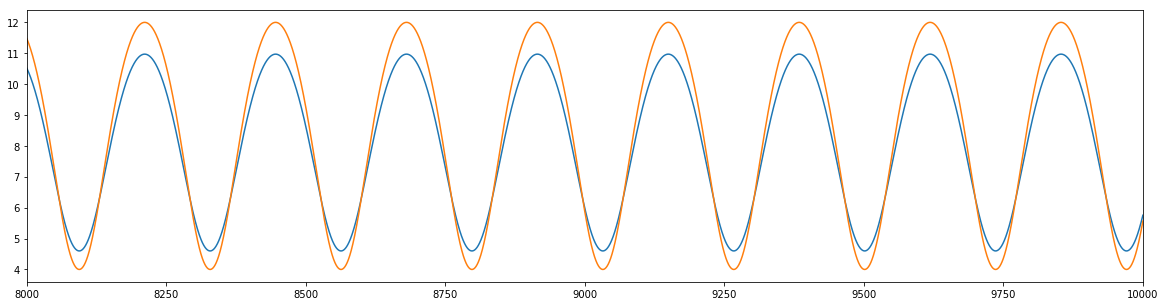

In [32]:
fig=plt.figure()
fig.set_size_inches(20, 5)
plt.xlim(8000,10000)
plt.plot(t,r)
plt.plot(t2,r2)

In [27]:
d1=0.2
spin=0.5
e=0.5
p=6
try:
    index, tau2,t2,r2,th2,phi2,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt \
('C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(spin,d1,e,p),unpack=True)
except:
    print('trace_spin%.6f_d1%.6f_e0%.6f_p%.6f.dat  does not exist'%(spin,d1,e,p))
    quit()

In [33]:
d1=0
spin=0.5
e=mye
p=myp
filenamekerr='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(spin,d1,e,p)

In [34]:
d1=0.2
spin=0.5
e=0.5
p=6
filenamekrz='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(spin,d1,e,p)

In [35]:
THETA=np.pi/4
PHI=0
t1,h1=getwave(filenamekerr,THETA,PHI)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


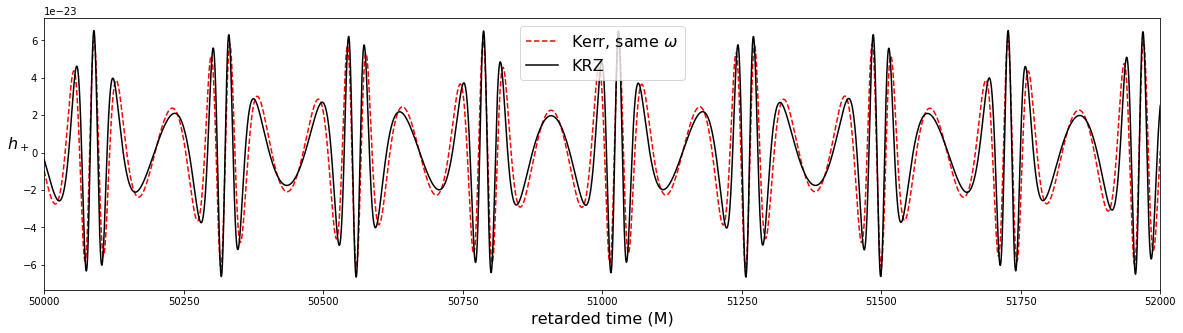

In [64]:
fig=plt.figure()
fig.set_size_inches(20,5)
plt.xlim(50000,52000)
plt.plot(t1,h1,'r--',label='Kerr, same $\omega$')
#plt.plot(t3,h3,'g:',label='Kerr, same $\omega^{(\\tau)}$')
plt.plot(t2,h2,'k',label='KRZ')
plt.xlabel('retarded time (M)',fontsize=16)
plt.ylabel('$h_+$',rotation=0,fontsize=16)
plt.legend(fontsize=16)

In [37]:
THETA=np.pi/4
PHI=0
t2,h2=getwave(filenamekrz,THETA,PHI)

In [43]:
bracket(h2,h1,0.1)/np.sqrt(bracket(h1,h1,0.1)*bracket(h2,h2,0.1))

0.89967444016634324

In [44]:
mye,myp

(0.40924824446845981, 6.4811700777724246)

In [54]:
taue=0.411496

In [55]:
taup=6.482550

In [56]:
d1=0
spin=0.5
e=taue
p=taup
filenametau='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(spin,d1,e,p)

In [57]:

t3,h3=getwave(filenametau,THETA,PHI)